# Домашнее задание 2 - EDA

### __Оценки-баллы__: 
- 1: 01-02
- 2: 03-04
- 3: 05-06
- 4: 07-08
- 5: 09-10
- 6: 11-12
- 7: 13-14
- 8: 15-16
- 9: 17-18
- 10: 19-25

__DL (срок сдачи ДЗ)__: 22.12.2021 22:00. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw4_5_ivanov_i_i.ipynb

In [1]:
import pandas as pd
import seaborn as sns
sns.set()

%pylab inline 

Populating the interactive namespace from numpy and matplotlib


### Задание 1 [20]

Используя датасет "pimdb.csv", провести EDA. Выявить инсайты

In [2]:
data = pd.read_csv('./pimdb.csv', sep=';')
data.shape

(14761, 10)

Посмотрим на данные. Видим 10 признаков, 2 из них нечисловые.

In [3]:
data.head(10)

,Title,ImdbRating,RatingCount,Duration,Type,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
0,der vagabund und das kind,8.4,40550.0,3240.0,video.movie,1.0,0.0,19.0,96.0,85.0
1,goldrausch,8.3,45319.0,5700.0,video.movie,2.0,1.0,35.0,NaN,122.0
2,metropolis,8.4,81007.0,9180.0,video.movie,3.0,4.0,67.0,428.0,376.0
3,der general,8.3,37521.0,6420.0,video.movie,1.0,1.0,53.0,123.0,219.0
4,lichter der gro stadt,8.7,70057.0,5220.0,video.movie,2.0,0.0,38.0,187.0,186.0
5,m,8.5,73726.0,7020.0,video.movie,1.0,NaN,28.0,4.0,254.0
6,es geschah in einer nacht,8.3,46503.0,6300.0,video.movie,4.0,1.0,40.0,183.0,211.0
7,moderne zeiten,8.6,90847.0,5220.0,video.movie,3.0,1.0,44.0,27.0,180.0
8,vom winde verweht,8.2,160414.0,14280.0,video.movie,10.0,6.0,143.0,1263.0,653.0
9,mr smith geht nach washington,8.4,58169.0,7740.0,video.movie,4.0,10.0,34.0,110.0,226.0


In [4]:
data.describe()

,ImdbRating,RatingCount,Duration,WinsCount,NominationsCount,PhotosCount,NewsArticlesCount,UserReviewsCount
count,13551.000000,1.355100e+04,13745.000000,14740.000000,14750.000000,14749.000000,14755.000000,14760.000000
mean,6.865707,2.642480e+04,5424.595417,3.094912,4.514847,23.564852,248.316232,103.246545
std,1.119515,6.506456e+04,2784.823414,9.232477,16.188559,65.308934,1051.450455,229.113560
min,1.000000,5.000000e+00,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.300000,6.025000e+02,3720.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,7.000000,3.977000e+03,5700.000000,0.000000,0.000000,7.000000,8.000000,30.000000
75%,7.600000,2.085850e+04,6660.000000,2.000000,3.000000,26.000000,101.000000,103.000000
max,9.900000,1.183395e+06,68400.000000,226.000000,542.000000,2810.000000,32345.000000,4928.000000


In [5]:
data.describe(include=['O'])

,Title,Type
count,14751,14761
unique,14155,4
top,the tonight show with jay leno episode tv episode,video.movie
freq,88,11072


Видно, что есть дубликаты по названию произведения.

In [6]:
data.isnull().sum()

Title                  10
ImdbRating           1210
RatingCount          1210
Duration             1016
Type                    0
WinsCount              21
NominationsCount       11
PhotosCount            12
NewsArticlesCount       6
UserReviewsCount        1
dtype: int64

Есть пропуски значений всех признаков, кроме типа произведения. Больше всего пропусков в `ImdbRating`, `RatingCount` и `Duration`. 

Пропусков достаточно много, заполним их медианным значением.

In [7]:
filled_data = data.copy()

for col_name in ['ImdbRating', 'RatingCount', 'Duration', 'WinsCount', 'NominationsCount', 'PhotosCount', 'NewsArticlesCount', 'UserReviewsCount']:
    filled_data[col_name] = filled_data[col_name].fillna(filled_data[col_name].median())

filled_data.isnull().sum()

Title                10
ImdbRating            0
RatingCount           0
Duration              0
Type                  0
WinsCount             0
NominationsCount      0
PhotosCount           0
NewsArticlesCount     0
UserReviewsCount      0
dtype: int64

array([[<AxesSubplot:title={'center':'ImdbRating'}>,
        <AxesSubplot:title={'center':'RatingCount'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'WinsCount'}>,
        <AxesSubplot:title={'center':'NominationsCount'}>,
        <AxesSubplot:title={'center':'PhotosCount'}>],
       [<AxesSubplot:title={'center':'NewsArticlesCount'}>,
        <AxesSubplot:title={'center':'UserReviewsCount'}>,
        <AxesSubplot:>]], dtype=object)

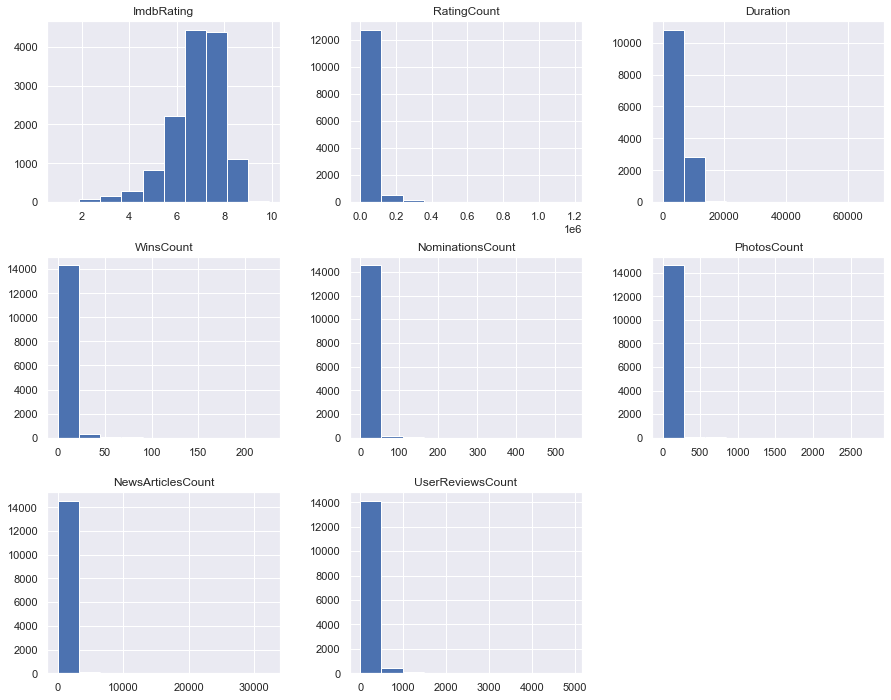

In [8]:
data.hist(figsize=(15,12))

array([[<AxesSubplot:title={'center':'ImdbRating'}>,
        <AxesSubplot:title={'center':'RatingCount'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'WinsCount'}>,
        <AxesSubplot:title={'center':'NominationsCount'}>,
        <AxesSubplot:title={'center':'PhotosCount'}>],
       [<AxesSubplot:title={'center':'NewsArticlesCount'}>,
        <AxesSubplot:title={'center':'UserReviewsCount'}>,
        <AxesSubplot:>]], dtype=object)

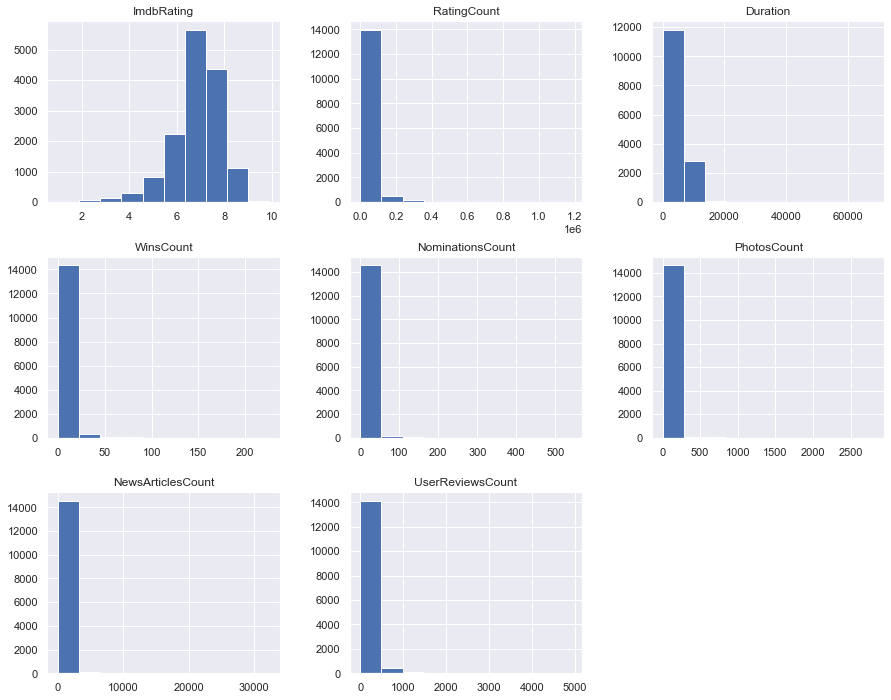

In [9]:
filled_data.hist(figsize=(15,12))

Все числовые признаки кроме `ImdbRating` прижаты к нулю, что указывает на то, что возможно их распределение лог-нормальное.

array([[<AxesSubplot:title={'center':'RatingCount'}>,
        <AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'WinsCount'}>],
       [<AxesSubplot:title={'center':'NominationsCount'}>,
        <AxesSubplot:title={'center':'PhotosCount'}>,
        <AxesSubplot:title={'center':'NewsArticlesCount'}>],
       [<AxesSubplot:title={'center':'UserReviewsCount'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

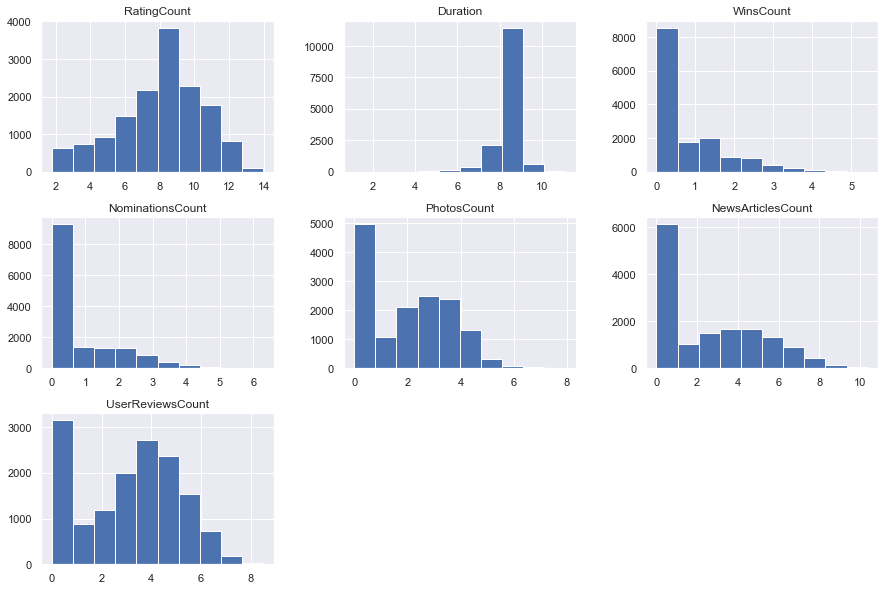

In [10]:
np.log(1+filled_data[['RatingCount', 'Duration', 'WinsCount', 'NominationsCount', 'PhotosCount', 'NewsArticlesCount', 'UserReviewsCount']]).hist(figsize=(15,10))

Посмотрим выбросы.

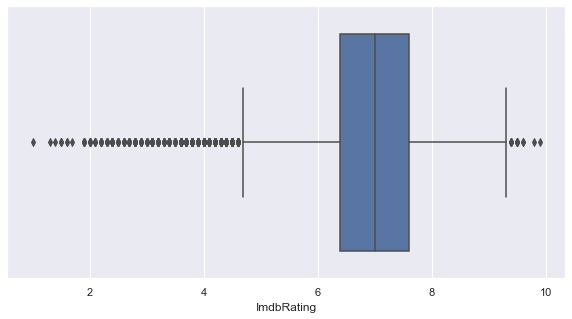

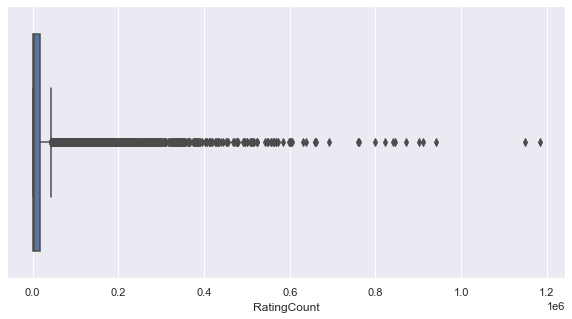

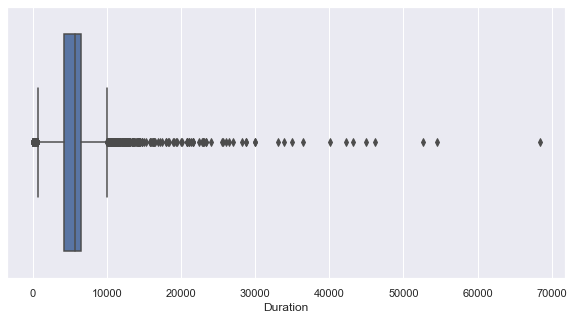

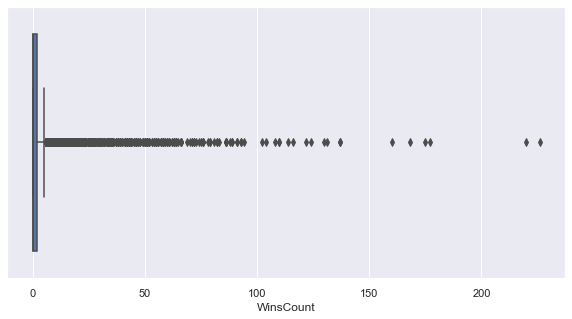

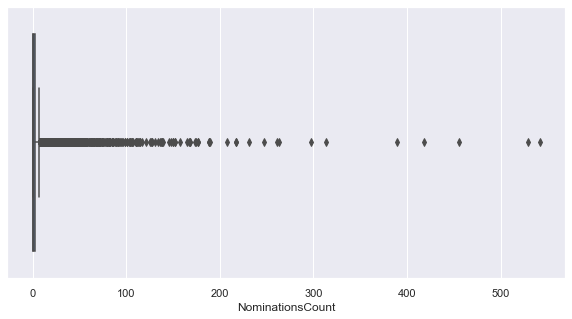

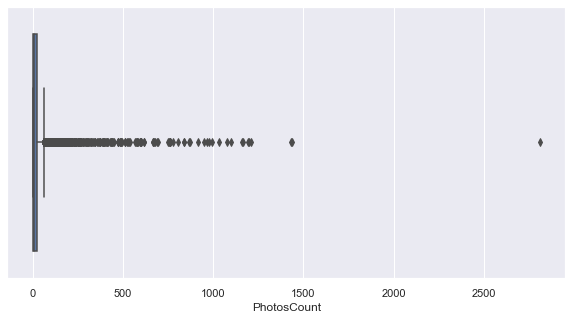

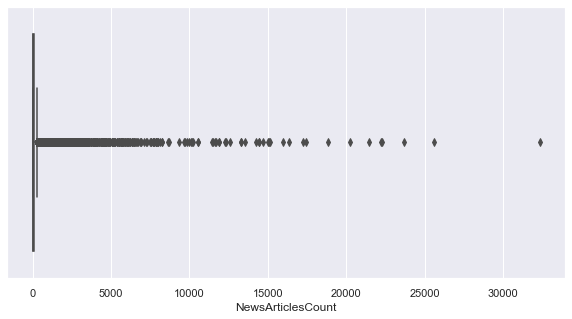

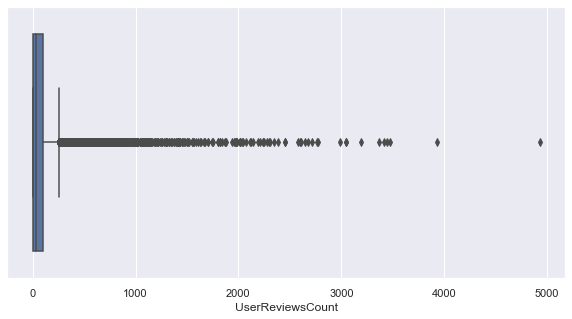

In [11]:
float_col = [col for col in data.columns if data[col].dtypes!=object]

for col in float_col:
    plt.figure(figsize=(10,5))
    ax1 = sns.boxplot(x=filled_data[col])

Во всех признаках есть выбросы, попробуем их приравнять к крайним нормальным значениям.

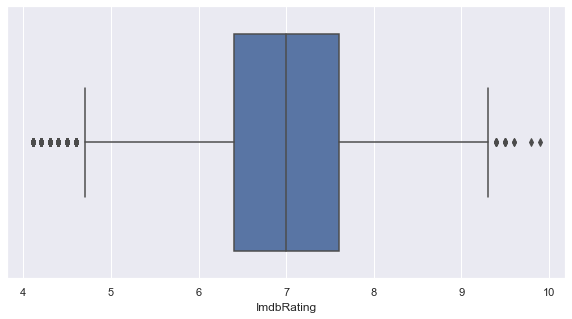

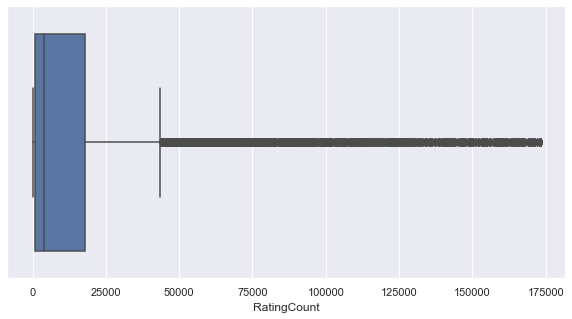

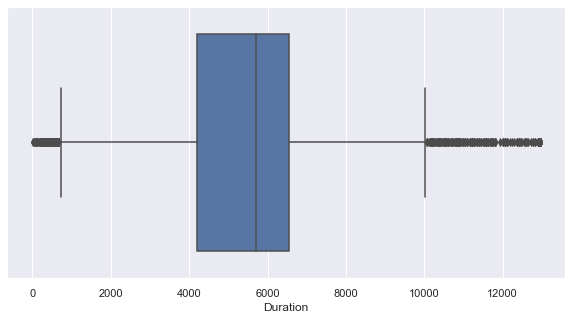

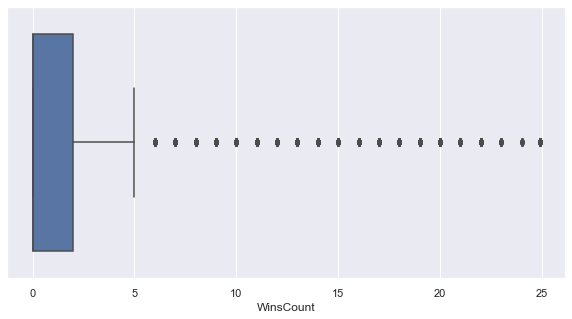

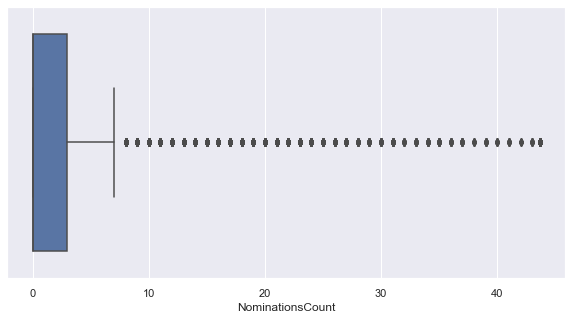

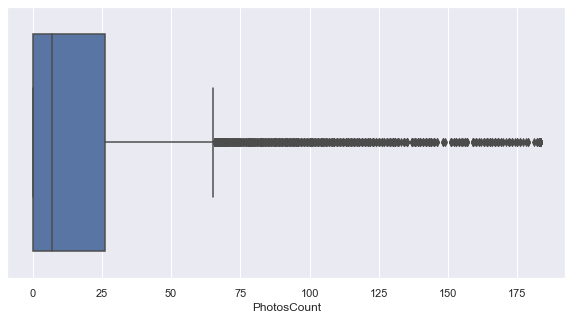

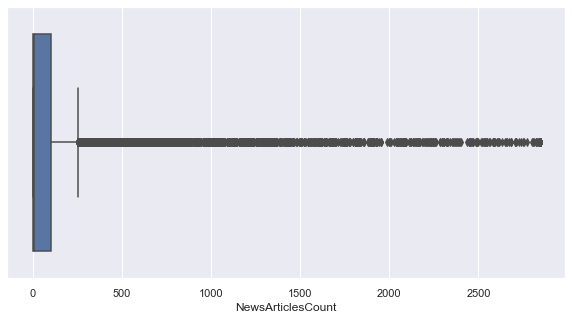

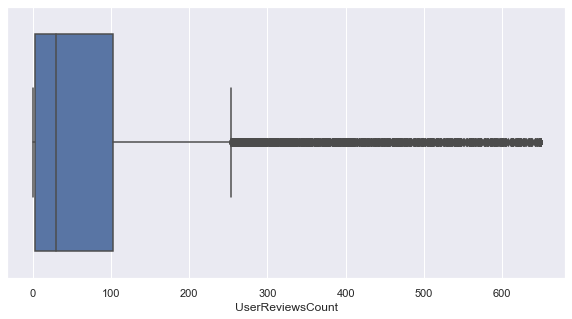

In [12]:
def get_normal_value(x, left, right):
    if x > right:
        return right
    if x < left:
        return left
    return x

def bound_emissions(col, data):
    normal_left = data[col].median() - 2.698 * data[col].std() 
    normal_right = data[col].median() + 2.698 * data[col].std()
    return data[col].map(lambda x: get_normal_value(x, normal_left, normal_right))

for col in float_col:
    filled_data[col]=bound_emissions(col, filled_data)
    plt.figure(figsize=(10,5))
    ax1 = sns.boxplot(x=filled_data[col])

array([[<AxesSubplot:title={'center':'ImdbRating'}>,
        <AxesSubplot:title={'center':'RatingCount'}>,
        <AxesSubplot:title={'center':'Duration'}>],
       [<AxesSubplot:title={'center':'WinsCount'}>,
        <AxesSubplot:title={'center':'NominationsCount'}>,
        <AxesSubplot:title={'center':'PhotosCount'}>],
       [<AxesSubplot:title={'center':'NewsArticlesCount'}>,
        <AxesSubplot:title={'center':'UserReviewsCount'}>,
        <AxesSubplot:>]], dtype=object)

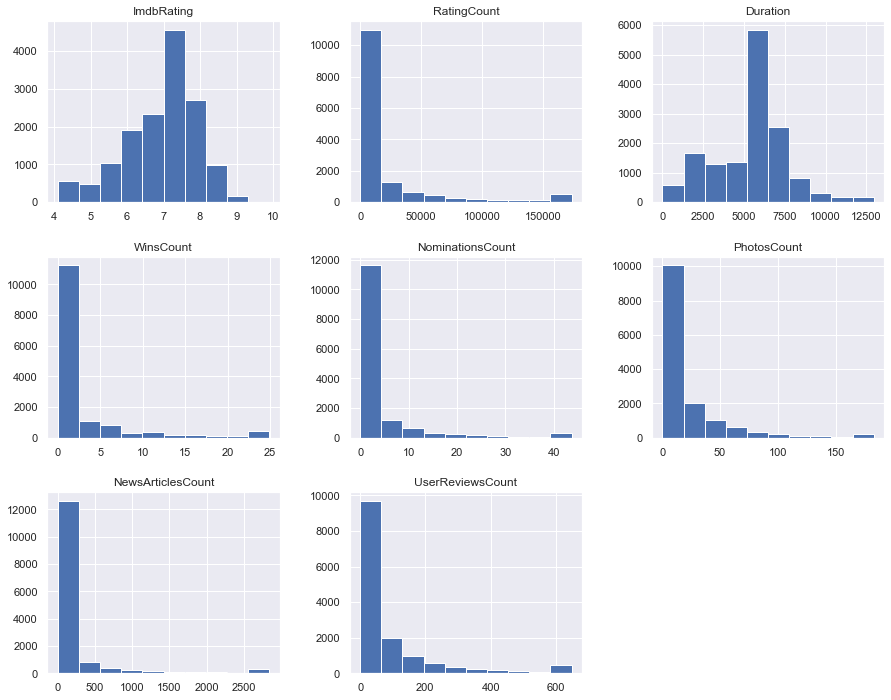

In [13]:
filled_data.hist(figsize=(15,12))

Построим тепловую карту корреляций, чтобы найти зависимости между признаками.

<AxesSubplot:>

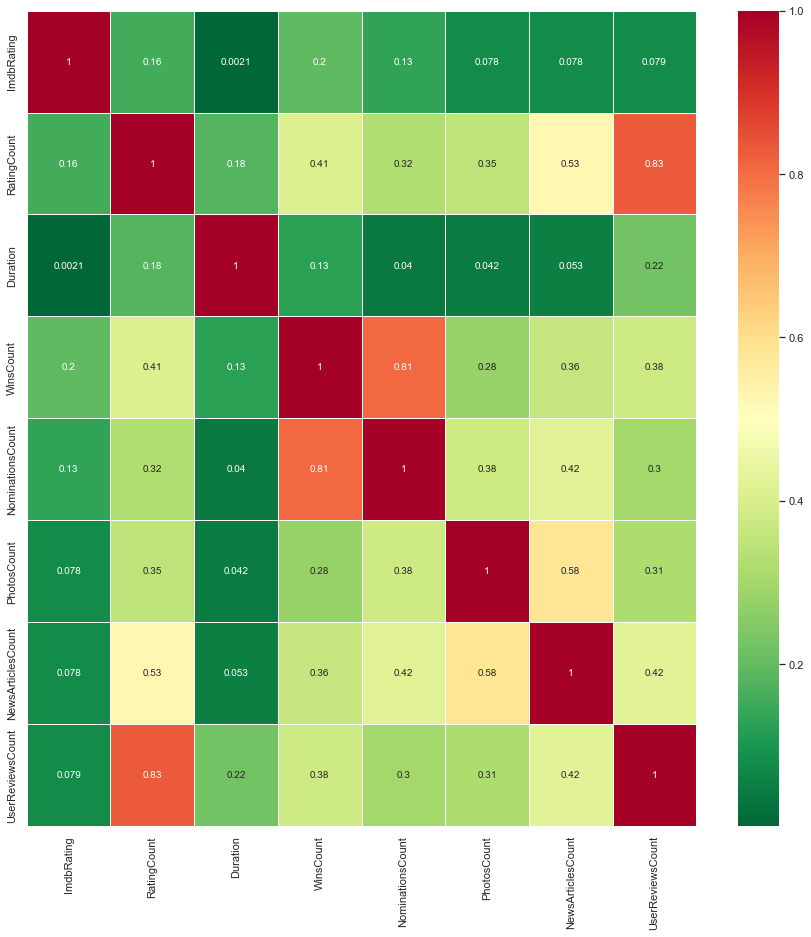

In [14]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), cmap='RdYlGn_r', linewidths=1, annot=True)

По карте видны явные около линейные зависимости между `RatingCount` и `UserReviewsCount` (количество оценок и отзывов), `NominationsCount` и `WinsCount` (количество номинаций и побед).

### Type vs ImdbRating 

In [15]:
filled_data.Type.value_counts()

video.movie      11072
video.episode     1979
video.tv          1591
game               119
Name: Type, dtype: int64

Ожидаемо больше всего фильмов.

In [16]:
filled_data[['Type', 'ImdbRating']].groupby(['Type'], as_index=False).mean()

,Type,ImdbRating
0,game,7.740481
1,video.episode,7.330349
2,video.movie,6.754286
3,video.tv,7.301488


<AxesSubplot:xlabel='Type', ylabel='ImdbRating'>

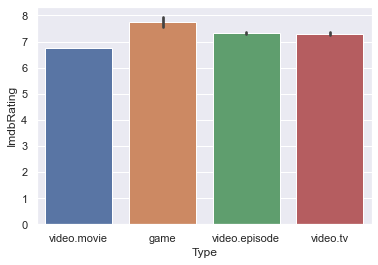

In [17]:
sns.barplot(x='Type', y='ImdbRating', data=filled_data)

Как видим, у игр средний рейтинг оказался выше остальных. А ниже всех фильмы.

### Duration vs ImdbRating 

/Users/bestk1ng/Education/Master/Term 1/Data Analysis/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:>

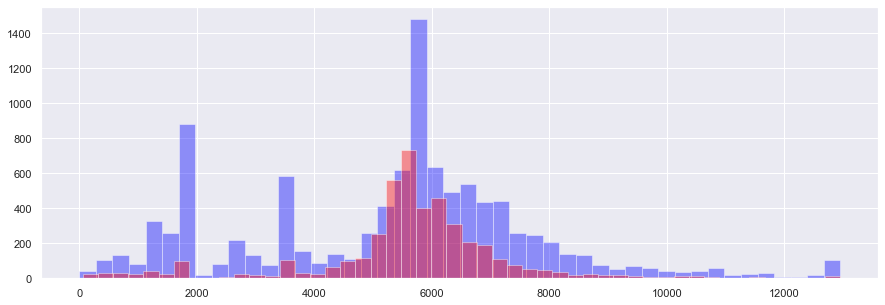

In [18]:
high_rate = filled_data[filled_data['ImdbRating'] > 6.5]
low_rate = filled_data[filled_data['ImdbRating'] <= 6.5]

plt.figure(figsize=[15,5])

sns.distplot(high_rate['Duration'].values, kde=False, color='blue')
sns.distplot(low_rate['Duration'].values, kde=False, color='red')

Количество короткометражек с высоким рейтингом больше, чем с низким.

### Duration+Type vs ImdbRating 

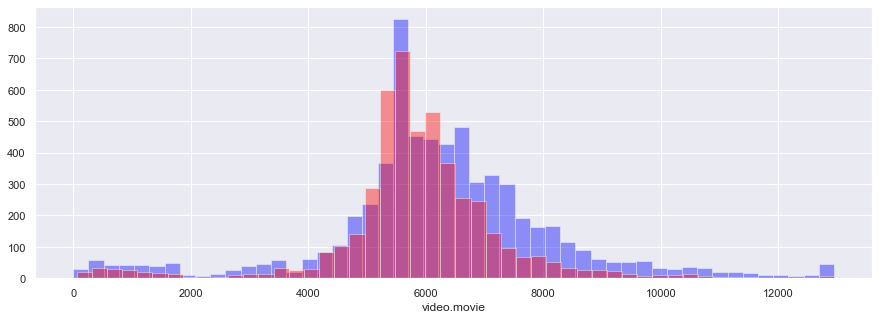

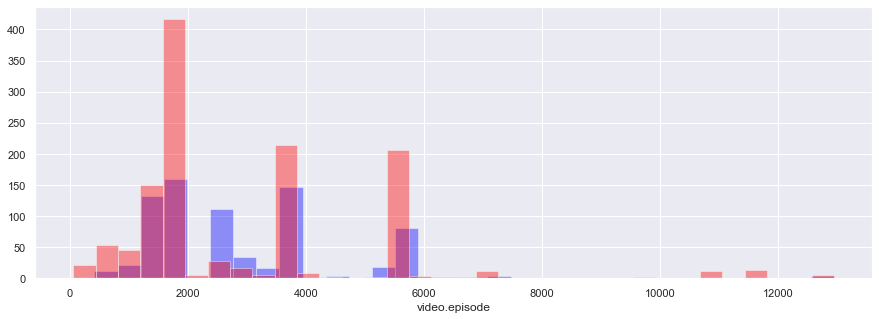

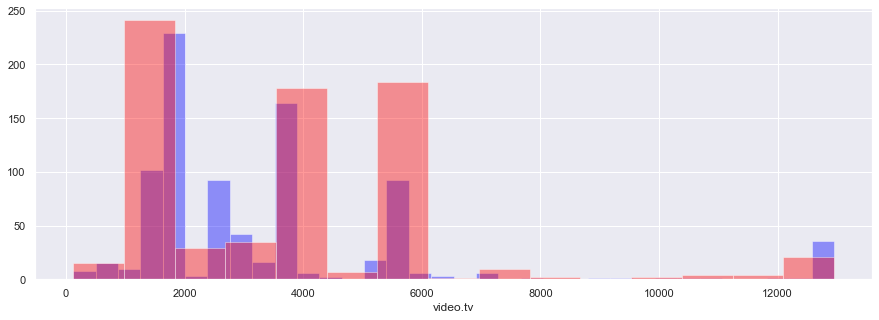

In [19]:
def show_duration_graph(type):
    rating_bound = filled_data[filled_data['Type'] == type]['ImdbRating'].mean()
    
    high_rate = filled_data[(filled_data['ImdbRating'] > rating_bound) & (filled_data['Type'] == type)]
    low_rate = filled_data[(filled_data['ImdbRating'] <= rating_bound) & (filled_data['Type'] == type)]
    
    plt.figure(figsize=[15,5])
    
    sns.distplot(high_rate['Duration'].values, kde=False, color='blue')
    sns.distplot(low_rate['Duration'].values, kde=False, color='red', axlabel=type)
  
show_duration_graph('video.movie')  
show_duration_graph('video.episode')  
show_duration_graph('video.tv')  

- **Фильмы**: фильмов с высоким рейтингом и длительностью >2 часов больше.
- **Сериалы и TV-шоу**: на обоих графиках видны пики популярных форматов (25 минут и 55 минут), но также есть пик с высоким рейтингом и длительностью чуть больше получаса.

### NominationsCount vs ImdbRating 

<AxesSubplot:xlabel='Nominated', ylabel='ImdbRating'>

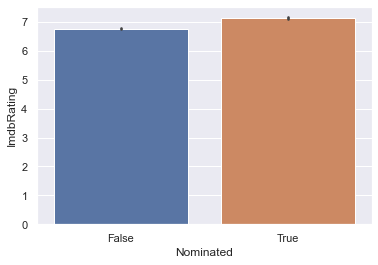

In [20]:
filled_data['Nominated'] = filled_data['NominationsCount'] > 0

sns.barplot(x='Nominated', y='ImdbRating', data=filled_data)

В среднем рейтинг номинируемых произведений немного выше.

/Users/bestk1ng/Education/Master/Term 1/Data Analysis/env/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/bestk1ng/Education/Master/Term 1/Data Analysis/env/lib/python3.8/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/bestk1ng/Education/Master/Term 1/Data Analysis/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


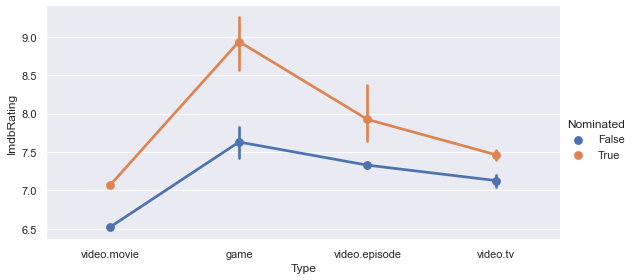

In [21]:
sns.factorplot('Type', 'ImdbRating', hue='Nominated', size=4, aspect=2, data=filled_data)

Игры выделяются наибольшим различием рейтинга при учете номирования.

### WinsCount vs ImdbRating 

<AxesSubplot:xlabel='Winner', ylabel='ImdbRating'>

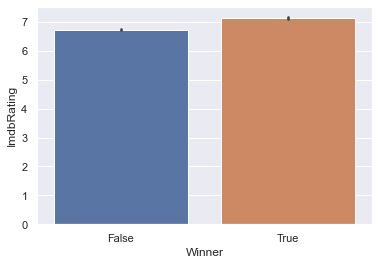

In [22]:
filled_data['Winner'] = filled_data['WinsCount'] > 0

sns.barplot(x='Winner', y='ImdbRating', data=filled_data)

/Users/bestk1ng/Education/Master/Term 1/Data Analysis/env/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/bestk1ng/Education/Master/Term 1/Data Analysis/env/lib/python3.8/site-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/bestk1ng/Education/Master/Term 1/Data Analysis/env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


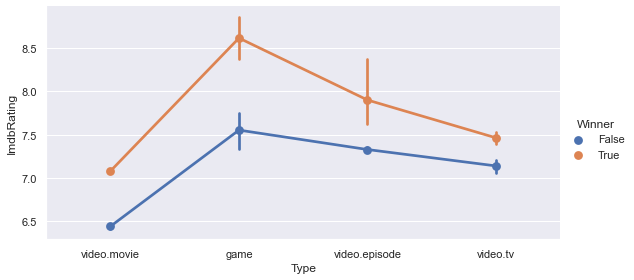

In [23]:
sns.factorplot('Type', 'ImdbRating', hue='Winner', size=4, aspect=2, data=filled_data)

Аналогичная картина как и с `NominationsCount`.

### NewsArticlesCount vs ImdbRating 

/Users/bestk1ng/Education/Master/Term 1/Data Analysis/env/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='NewsArticlesCount'>

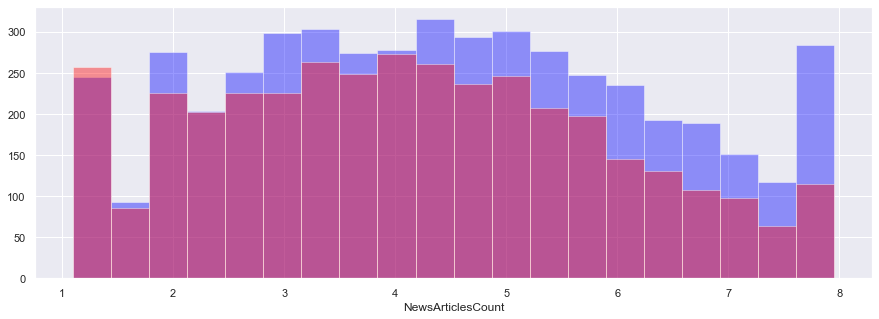

In [24]:
rating_bound = filled_data['ImdbRating'].mean()

filled_data['HighRating'] = filled_data['ImdbRating'] > rating_bound

high_rate = filled_data[(filled_data['HighRating'] == True) & (filled_data['NewsArticlesCount'] >= 1)]
low_rate = filled_data[(filled_data['HighRating'] == False) & (filled_data['NewsArticlesCount'] >= 1)]

plt.figure(figsize=[15,5])

sns.distplot(np.log(1+high_rate['NewsArticlesCount']), kde=False, color='blue')
sns.distplot(np.log(1+low_rate['NewsArticlesCount']), kde=False, color='red')

<AxesSubplot:xlabel='Type', ylabel='NewsArticlesCount'>

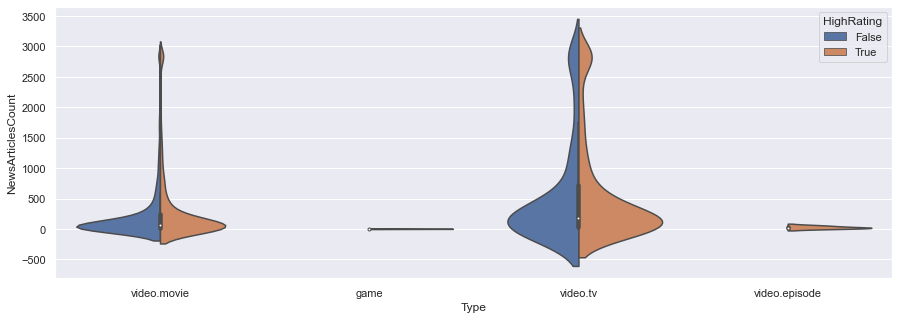

In [25]:
plt.figure(figsize=(15,5))
sns.violinplot(x="Type", 
               y="NewsArticlesCount", 
               hue="HighRating", 
               data=filled_data[filled_data['NewsArticlesCount'] >= 1], 
               split=True)

При увеличении количества статей, увеличивается количество высокорейтинговых картин.

### Задание 2 [5]*

Используя датасет "pimdb.csv", после EDA построить модель регрессии для предсказания рейтинга фильма ImdbRating